In [75]:
import pandas as pd
import numpy as np
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential

In [76]:
pokemons = pd.read_csv('data/pokemon.csv')

types = {t: num for num, t in enumerate(set(pokemons['Type 1']) | set(pokemons['Type 2']))}
pokemons['Type 1'] = pokemons['Type 1'].apply(func=lambda x: types[x])
pokemons['Type 2'] = pokemons['Type 2'].apply(func=lambda x: types[x])
del pokemons['Name']
pokemons.head()

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,11,17,45,49,49,65,65,45,1,False
1,2,11,17,60,62,63,80,80,60,1,False
2,3,11,17,80,82,83,100,100,80,1,False
3,4,11,17,80,100,123,122,120,80,1,False
4,5,18,1,39,52,43,60,50,65,1,False


In [77]:
combats = pd.read_csv('data/combats.csv', header=None)
combats.columns = ['a', 'b', 'winner']
combats.head()

,a,b,winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [78]:
training = pd.merge(combats, pokemons, left_on='a', right_on='#').merge(pokemons, left_on='b', right_on='#')
training['winner'] = training['winner'] == training['a']
training['winner'] = training['winner'].astype(int)
del training['a']
del training['b']
del training['#_x']
del training['#_y']
training.head()

,winner,Type 1_x,Type 2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Generation_x,...,Type 1_y,Type 2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Generation_y,Legendary_y
0,0,4,6,50,64,50,45,50,41,2,...,11,10,70,70,40,60,40,60,3,False
1,0,12,1,70,80,50,35,35,35,1,...,11,10,70,70,40,60,40,60,3,False
2,0,13,6,110,78,73,76,71,60,3,...,11,10,70,70,40,60,40,60,3,False
3,1,14,0,50,65,107,105,107,86,4,...,11,10,70,70,40,60,40,60,3,False
4,1,15,1,73,115,60,60,60,90,3,...,11,10,70,70,40,60,40,60,3,False


In [79]:
labels = training['winner']
del training['winner']
labels.head()

0    0
1    0
2    0
3    1
4    1
Name: winner, dtype: int64

In [108]:
BATCH_SIZE = 500
EPOCHS = 20
TEST_FACTOR = 0.9
DROPOUT = 0.5
features = training.shape[1]
size = training.shape[0]
training_size = int(size * TEST_FACTOR)

model = Sequential()
model.add(Dense(units=64, input_shape=(features,), activation='relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(64, activation='relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

test_input = training[:training_size].values
test_output = labels[:training_size].values

model.fit(test_input, test_output, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/20
45000/45000 [==============================] - 0s - loss: 2.5327 - acc: 0.6661     
Epoch 2/20
45000/45000 [==============================] - 0s - loss: 0.5881 - acc: 0.7380     
Epoch 3/20
45000/45000 [==============================] - 0s - loss: 0.4970 - acc: 0.7830     
Epoch 4/20
45000/45000 [==============================] - 0s - loss: 0.4546 - acc: 0.8131     
Epoch 5/20
45000/45000 [==============================] - 0s - loss: 0.4259 - acc: 0.8299     
Epoch 6/20
45000/45000 [==============================] - 0s - loss: 0.4071 - acc: 0.8450     
Epoch 7/20
45000/45000 [==============================] - 0s - loss: 0.3894 - acc: 0.8575     
Epoch 8/20
45000/45000 [==============================] - 0s - loss: 0.3757 - acc: 0.8694     
Epoch 9/20
45000/45000 [==============================] - 0s - loss: 0.3635 - acc: 0.8768     
Epoch 10/20
45000/45000 [==============================] - 0s - loss: 0.3516 - acc: 0.8804     
Epoch 11/20
45000/45000 [========================

In [109]:
validate_input = training[training_size+1:].values
validate_output = labels[training_size+1:].values

accuracy = model.evaluate(validate_input, validate_output, batch_size=10)
accuracy

4830/4999 [===========================>..] - ETA: 0s

[0.2164423127106653, 0.93378675241521847]

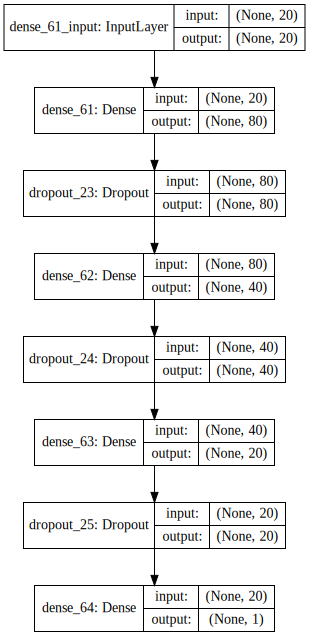

In [97]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))